In [7]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import warnings
warnings.simplefilter('ignore')

# A closer look at the data

In [1]:
import sys
sys.path.append('../')

import numpy as np
import pandas as pd
import geopandas as gpd
import rasterio

from tqdm import tqdm
from config import interim_data_dir, raw_data_dir

from src.utils import read_shapefile

dataset_version = "v6"

In [2]:
shp_train = read_shapefile('train')
shp_test = read_shapefile('test')

shp_test['y'] = 'test'
shp_train.drop('Crop_Id_Ne', axis=1, inplace=True)

# Combine train and test
shp_df = pd.concat([shp_train, shp_test])

shp_df.head()

,Area,Subregion,geometry,y
Field_Id,,,,
1,0.915905,3,"POLYGON ((613924.3324000851 6793991.295069702,...",Vineyard
2,2.064410,3,"POLYGON ((614404.0717397591 6794020.579634549,...",Pecan
3,1.080300,3,"POLYGON ((614320.2146632321 6793964.242091182,...",Vineyard
4,1.316190,3,"POLYGON ((614560.5326844405 6794002.249461887,...",Vineyard
7,5.529220,3,"POLYGON ((614596.6564746551 6794269.865436315,...",Vineyard


## Add centroid and X,Y coordinates

In [3]:
shp_df['centroid'] = shp_df.geometry.centroid
shp_df['x_coord'] = shp_df.centroid.x
shp_df['y_coord'] = shp_df.centroid.y

In [4]:
shp_df.Area.describe()

count    3568.000000
mean        2.487380
std         2.557033
min         0.009753
25%         1.008490
50%         1.907890
75%         3.196633
max        52.723100
Name: Area, dtype: float64

In [5]:
shp_df.loc[2314]

Area                                                 0.0224113
Subregion                                                    6
geometry     POLYGON ((561215.7244953141 6855989.687970636,...
y                                                        Dates
centroid           POINT (561209.7779387282 6855980.113480322)
x_coord                                                 561210
y_coord                                            6.85598e+06
Name: 2314, dtype: object

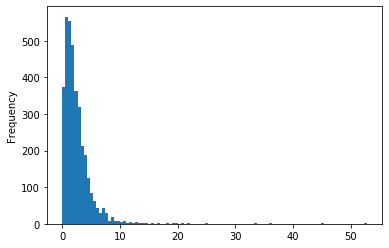

In [10]:
shp_df.Area.plot.hist(bins=100)

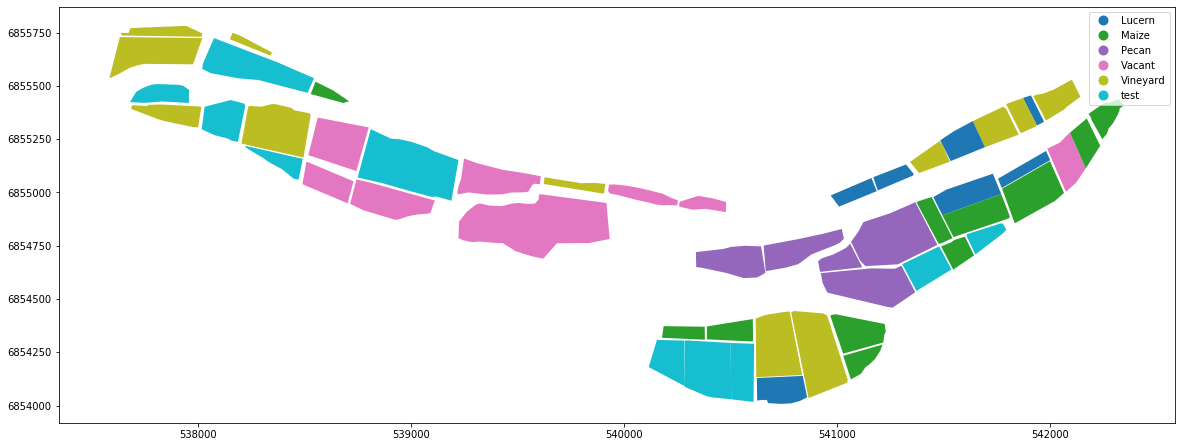

In [14]:
shp_df.loc[shp_df.Subregion == 7].plot(figsize=(20,20), column='y', legend=True, categorical=True)

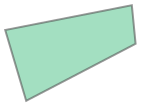

In [16]:
shp_df.loc[1].geometry

In [21]:
from config import interim_data_dir
import rasterio
from rasterio.mask import mask


with rasterio.open(interim_data_dir /'images-merged' / '2017-02-10' / 'B05.jp2') as raster:
    farm_mask = mask(raster, [shp_df.loc[2314].geometry], crop=True)

In [22]:
farm_mask

(array([[[0, 0, 0],
         [0, 0, 0]]], dtype=uint16), Affine(20.0, 0.0, 561180.0,
        0.0, -20.0, 6856000.0))